<a href="https://colab.research.google.com/github/SeffySnow/CV_Sepinood/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: import pandas matplotlip, numpy

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import drive


url = "https://raw.githubusercontent.com/SeffySnow/GA-community-detection/main/com-dblp.ungraph.txt"



# Creating the dataframe

In [ ]:
!pip install --upgrade pip
!pip install networkx matplotlib
!pip install snappy



In [17]:
data = pd.read_csv(url,delimiter='\t')
data.rename(columns={data.columns[0]: "FromNodeID", data.columns[1]: "ToNodeID"}, inplace=True)
network_data= pd.DataFrame(data)
network_data.head()
len(network_data)

1049865

In [5]:
import networkx as nx


# Creating a subgraph from the main network

In [50]:
num_node= 50
network_small_indices = np.random.choice(network_data.index, size = num_node, replace=False)

network_small = network_data.iloc[network_small_indices]
network_small=network_small.reset_index()
network_small.drop('index',axis=1,inplace=True)
unique_nodes = len(pd.concat([network_small['FromNodeID'],network_small['ToNodeID']]).unique())
unique_nodes

100

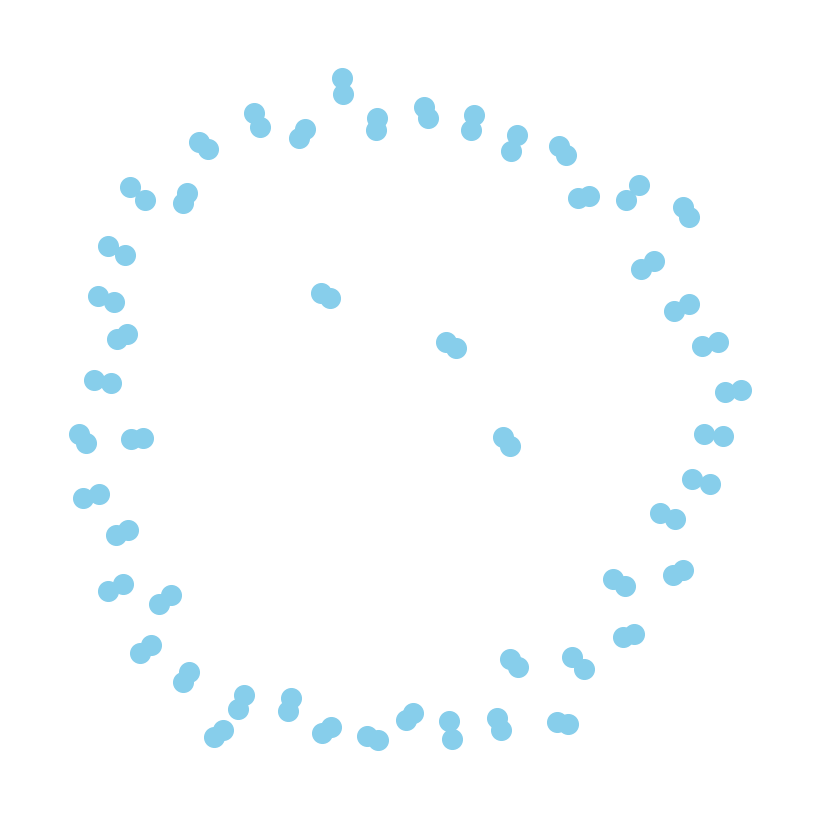

In [46]:
G =  nx.from_pandas_edgelist(network_small, "FromNodeID","ToNodeID")

plt.figure(figsize=(8,8))
nx.draw(G,with_labels=False, node_color ="skyblue", node_size =200, edge_color="k")


# create adjacency matrix from network_small

In [47]:


import numpy as np

# Convert the NetworkX graph to an adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).todense()

# Print the adjacency matrix
print(adjacency_matrix)
adj = pd.DataFrame(adjacency_matrix)

adj

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
